<a href="https://colab.research.google.com/github/glo-code/ecommerce-analysis/blob/main/ecommerce_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import datetime

In [77]:
df=pd.read_csv('Amazon Sale Report.csv',parse_dates=True,on_bad_lines='skip',low_memory=False)
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False




```
Indagine sui clienti


```



Ordine ID e Status

In [78]:
data=pd.to_datetime(df['Date'])
df['months']=data.dt.month_name()
df['year']=data.dt.year
df['day']=data.dt.day


group=df.groupby(['day','months','year'])[['Order ID','Status']].value_counts().reset_index()
mask=np.where(group['count']<group['count'].max())[0]
print('Order less than max:',group['count'].iloc[mask].sum(),'in the day:',group.iloc[mask])
mask2=group['count'][group['count']==group['count'].max()]
'Order == max:',mask2.value_counts(),'in the day:',group.iloc[mask2.index]


<ipython-input-78-c4cc771dfd87>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data=pd.to_datetime(df['Date'])


Order less than max: 128951 in the day:         day months  year             Order ID     Status  count
0         1  April  2022  403-9984530-4477124    Shipped      7
1         1  April  2022  404-5543645-7254764    Shipped      4
2         1  April  2022  407-3670630-4326760    Shipped      4
3         1  April  2022  402-3215188-3221118    Shipped      3
4         1  April  2022  406-9040211-5250700    Shipped      3
...     ...    ...   ...                  ...        ...    ...
120373   31    May  2022  171-1214739-8601135    Shipped      1
120374   31    May  2022  171-1151246-8589957    Shipped      1
120375   31    May  2022  171-1147889-8450743  Cancelled      1
120376   31    May  2022  171-1109176-4700353    Shipped      1
120377   31    May  2022  408-9910860-9722745  Cancelled      1

[120376 rows x 6 columns]


('Order == max:',
 count
 12    2
 Name: count, dtype: int64,
 'in the day:',
        day months  year             Order ID     Status  count
 43715   11  April  2022  403-4984515-8861958    Shipped     12
 46478   11    May  2022  171-5057375-2831560  Cancelled     12)

Notiamo che il massimo di ordini da parte di un cliente è di 12 mentre il minimo è 1.Il massimo di ordini si è verificato sia ad aprile che a maggio, soltanto che a maggio si è trattato non di ordini spediti ma cancellati dallo stesso cliente.
Abbiamo invece contro i 2 ordini più alti, 91354 ordini minimi da più clienti.


In [79]:
count=group.groupby('months')['Status'].value_counts().unstack()
count=count.fillna(0).astype(int)
count

Status,Cancelled,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping
months,,,,,,,,,,,,,
April,6726,1,0,27176,0,11093,2,1,2,6,849,2,0
June,4957,577,262,22023,1,5908,0,30,911,5,340,119,8
March,18,0,0,123,0,16,0,0,0,0,1,0,0
May,5484,6,0,23504,0,9549,2,1,5,0,661,9,0


April
June
March
May


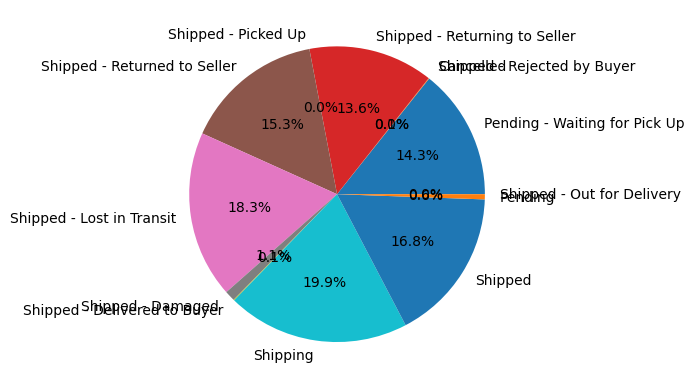

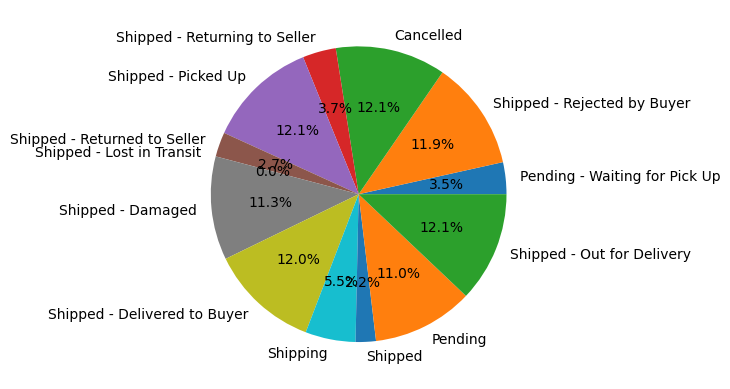

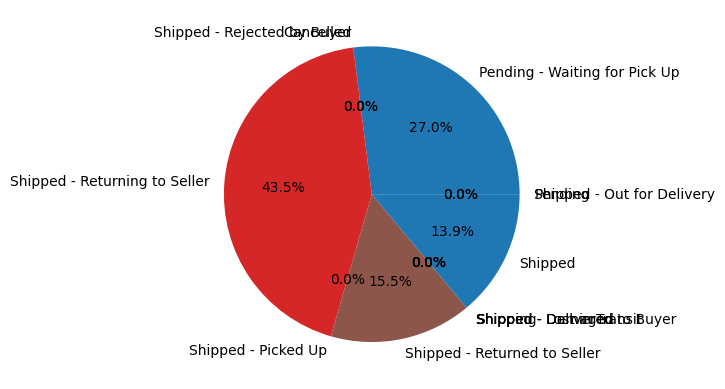

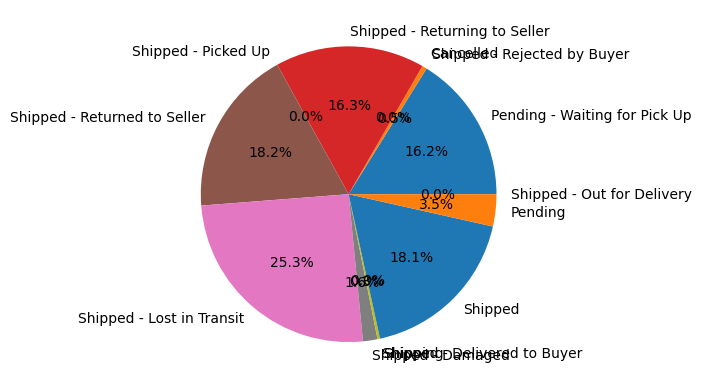

In [80]:
perc_precise=count/count.sum()*100
perc_precise.round(2).reset_index()


labels=set(df['Status'])

conteggio=0
for categorie in perc_precise:
    categorie=perc_precise.iloc[conteggio]
    print(categorie.name)
    ax,fig=plt.subplots()
    plt.pie(categorie,labels=labels,autopct='%1.1f%%')
    conteggio=conteggio+1
    if conteggio==len(perc_precise.index):
       break


Ordini per mese 0    37697
1    42040
2    49067
3      171
dtype: int64
Ordini totali 128975


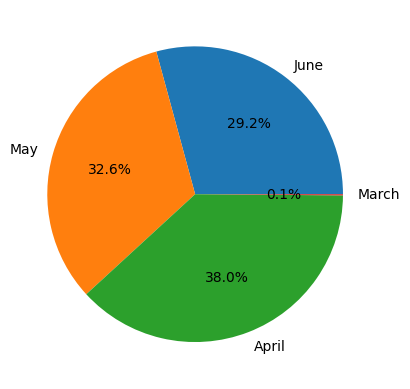

In [81]:
lista_mesi=['June','May','April','March']
ordini_totali=[]
for mese in lista_mesi:
    result=group['count'][group['months']==mese].sum()
    ordini_totali.append(result)

ordini_totali=pd.Series(ordini_totali)
print('Ordini per mese',ordini_totali)
print('Ordini totali',ordini_totali.sum())
perc=ordini_totali/ordini_totali.sum()*100
perc=perc.round(2)

ax,fig=plt.subplots()
plt.pie(perc,labels=lista_mesi,autopct='%1.1f%%')
plt.show()



Notiamo che ad Aprile abbiamo il maggior numero di ordini spediti (17.8%) e cancellati (15,5%). Abbiamo anche un modesto numero di ordini ritornati al venditore e in sospeso(16%). A giugno invece alto numero di ordini spediti ma anche cancellati anche se sono di meno rispetto ad aprile. Pochi però i resi e molti sospesi. A marzo nessun ordine sospeso e pochi cancellati ma ben il 44% degli ordini persi nel transito e 27% cancellati rispetto al 15,5% di aprile. E' il mese in cui si hanno avuti meno ordini. A maggio la maggior parte spediti e cancellati ed un numero moderato minore rispetto ad aprile di resi (21.6% rispetto al 16% di aprile). Pochi sospesi (18% rispetto ad aprile) e il 17% di persi nel transito e cancellati.

Quindi si è venduto di più tra aprile e maggio (47% e 40%) e modertamente a giugno (12%) e di meno a marzo (0.2%).



,Status,count
0,Shipped,60.32
1,Shipped - Delivered to Buyer,22.31
2,Cancelled,14.21
3,Shipped - Returned to Seller,1.51
4,Shipped - Picked Up,0.75
5,Pending,0.51
6,Pending - Waiting for Pick Up,0.22
7,Shipped - Returning to Seller,0.11
8,Shipped - Out for Delivery,0.03
9,Shipped - Rejected by Buyer,0.01


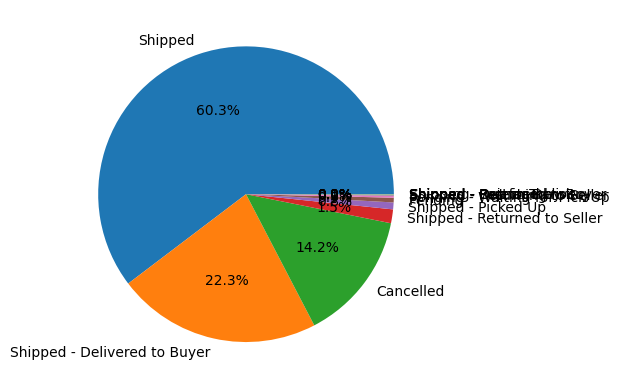

In [82]:
total=df['Status'].value_counts().sum()
status=df['Status'].value_counts().apply(lambda x:x/total*100).round(2).reset_index()
#status=status[status['count']!=0.0]
value=status['count']
fig,ax=plt.subplots()
labels=status['Status']
plt.pie(value,labels=labels,autopct='%1.1f%%')#,startangle=90,shadow=True,labeldistance=0.80,pctdistance=0.5)
status

Notiamo che la maggior parte degli ordini nei mesi indicati, sono stati spediti (circa il 58,8%) mentre il 25 % è stato spedito e consegnato al compratore. Il 14% invece è stato cancellato mentre soltanto 1.8% degli ordini è stato mandato indietro.
Soltanto per il 0,2% invece è stato effettuato il reso ma ancora l'ordine non è ritornato al venditore.



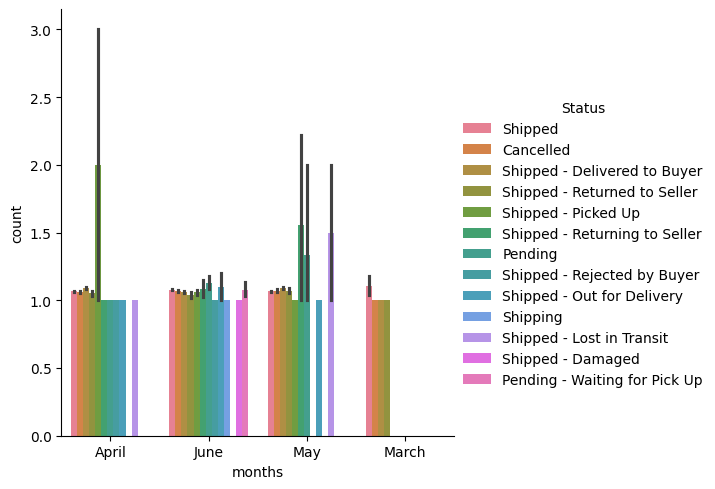

,day,months,year,Order ID,Status,count
0,1,April,2022,403-9984530-4477124,Shipped,7
1,1,April,2022,404-5543645-7254764,Shipped,4
2,1,April,2022,407-3670630-4326760,Shipped,4
3,1,April,2022,402-3215188-3221118,Shipped,3
4,1,April,2022,406-9040211-5250700,Shipped,3
...,...,...,...,...,...,...
120373,31,May,2022,171-1214739-8601135,Shipped,1
120374,31,May,2022,171-1151246-8589957,Shipped,1
120375,31,May,2022,171-1147889-8450743,Cancelled,1
120376,31,May,2022,171-1109176-4700353,Shipped,1


In [83]:

sns.catplot(group,x=group['months'],y=group['count'],kind='bar',hue='Status')
plt.show()
group

Tipo di prodotto acquistato


In [84]:
clothes=df['Category'].value_counts().reset_index()
perc_vestiti=clothes['count']/clothes['count'].sum()*100
vestiti_mesi=df.groupby('Category')['months'].value_counts().unstack()
vestiti_mesi.fillna(0).astype(int)
clothes.sum()

Category    SetkurtaWestern DressTopEthnic DressBlouseBott...
count                                                  128975
dtype: object

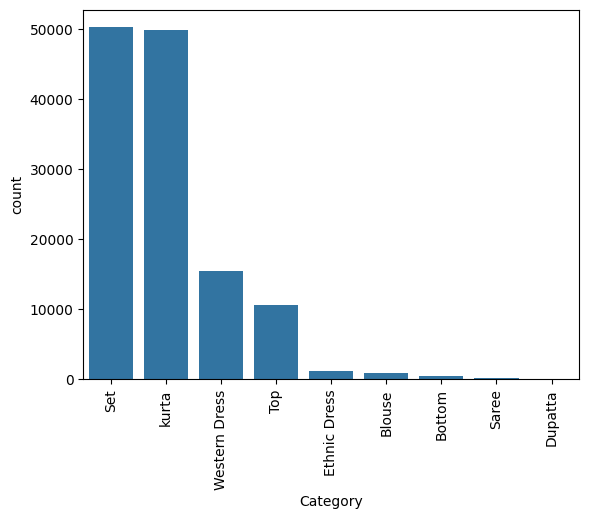

In [85]:
sns.barplot(clothes,x='Category',y='count')
plt.xticks(rotation=90)
plt.show()

Notiamo che i prodotti più acquistati in assoluto sono i set e la kurta e moderatamente il western dress e top. I prodotti meno acquistati sono ethnic dress, blouse, bottom e saree e ancora meno (soltanto 3 acquisti) il dupatta.
Dalle percentuali notiamo che il 39% acquista il set e il 38% il kurta mentre il 12% il western dress e soltanto l'8.2% il top.

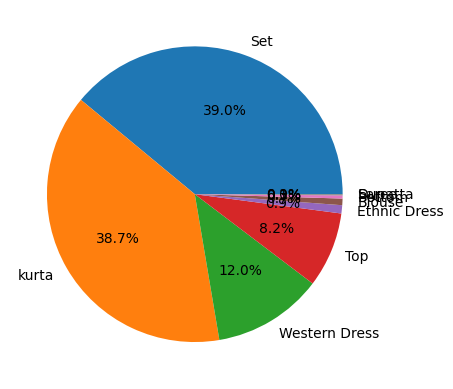

0    38.987401
1    38.671836
2    12.017833
3     8.235705
4     0.898624
5     0.717969
6     0.341151
7     0.127156
8     0.002326
Name: count, dtype: float64

In [86]:
ax,fig=plt.subplots()
plt.pie(perc_vestiti,labels=clothes['Category'],autopct='%1.1f%%')
plt.show()
perc_vestiti

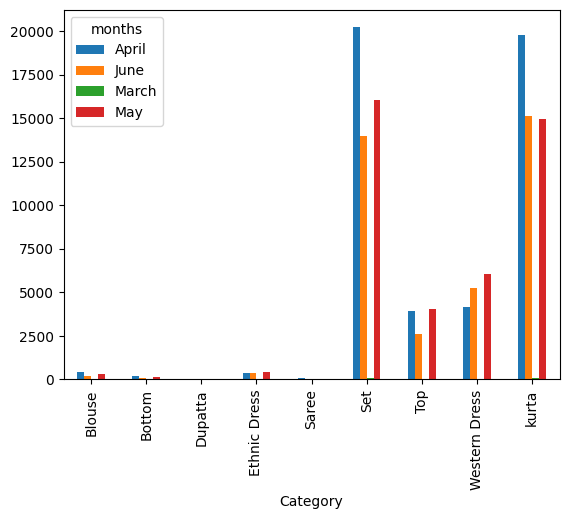

In [87]:
#ax,fig=plt.subplots()
vestiti_mesi.plot(kind='bar')
plt.show()

I set e i kurta sono stati più venduti nel mese di aprile, di più i set e i set anche nel mese di maggio sono stati più venduti rispetto ai kurta, che invece sono stati più venduti durante il mese di giugno. I top e i western dress invece hanno avuto poche vendite rispetto ai set e ai kurta ma i western dress nel mese di maggio e giugno sono stati più venduti rispetto ai top.

In [88]:

taglie=pd.crosstab(df['Category'],[df['Size']]).reset_index()
taglie.round(4)

Size,Category,3XL,4XL,5XL,6XL,Free,L,M,S,XL,XS,XXL
0,Blouse,0,0,0,0,211,136,154,140,133,28,124
1,Bottom,64,0,0,0,0,71,58,74,71,28,74
2,Dupatta,0,0,0,0,3,0,0,0,0,0,0
3,Ethnic Dress,172,0,0,0,0,192,180,176,194,88,157
4,Saree,0,0,0,0,164,0,0,0,0,0,0
5,Set,5795,48,61,81,0,8194,9347,7512,7572,5506,6168
6,Top,1184,0,0,0,0,1774,1825,1238,1855,949,1797
7,Western Dress,1915,0,0,0,0,2845,2587,2225,2379,1431,2118
8,kurta,5686,379,489,657,0,8920,8560,5725,8672,3131,7658


<Axes: xlabel='Size'>

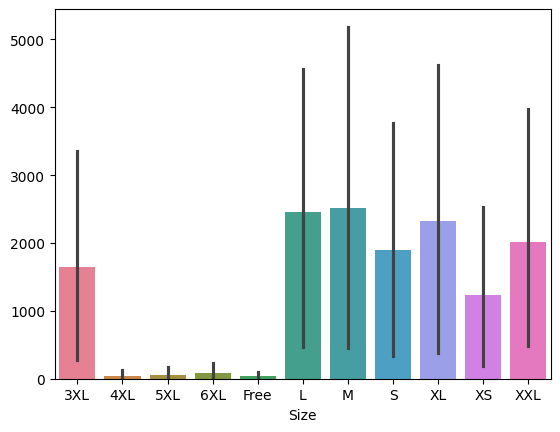

In [89]:
sns.barplot(taglie)

La taglia più venduta è la M/L mentre quella meno venduta è la XS e la 3XL. Mentre le taglie oltre la 3XL sono vendute ancora più raramente e anche la taglia Free.

Spesa


In [90]:
'Il prezzo massimo/minimo e medio sono:',df['Amount'].describe()[['max','min','mean']]
prezzo=df.groupby('months')['Amount'].mean().reset_index()
prezzo

,months,Amount
0,April,626.003046
1,June,661.484424
2,March,627.678086
3,May,663.356858


In [91]:
c=df.groupby('Category')['Amount'].value_counts().unstack()
c.fillna(0).astype(int)

Amount,0.00,199.00,218.10,229.00,236.19,237.14,241.00,246.67,248.00,249.00,...,2676.00,2698.00,2796.00,2860.00,2864.00,2894.00,3036.00,4235.72,5495.00,5584.00
Category,,,,,,,,,,,,,,,,,,,,,
Blouse,22,0,0,1,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
Bottom,12,0,1,14,0,0,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Dupatta,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ethnic Dress,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Saree,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Set,1013,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,1,1,1,1
Top,174,0,0,0,0,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
Western Dress,231,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
kurta,858,3,0,6,2,4,0,6,4,44,...,0,0,1,0,0,0,0,0,0,0


In media i clienti spendono 648,56 dollari per acquistare la merce in totale. Il prezzo medio ad Marzo è stato 627, a Aprile 626 per poi aumentare a Maggio 663 e scendere leggermente a Giugno 661. Quindi in teoria i prezzi sono saliti tra Maggio e Giugno.

Notiamo però che la maggior parte degli acquisti di alcuni articoli sono costati 0.00 e questa è una cosa strana. Anche se notiamo che tra i kurta ben 44 siano stati venduti a 249.00 mentre 14 bottom a 229.00 e 7 blouse a 249.00 ma il resto è minore.
Perchè la maggior parte degli articoli sono stati acquistati gratis?

In [92]:
promozioni=df.groupby('promotion-ids')['Amount'].value_counts().reset_index()
vestiti_promo=df.groupby('promotion-ids')[['Category','months']].value_counts()#.reset_index()#'amount' con category
vestiti_promo_2=vestiti_promo.copy().reset_index()
print(promozioni[promozioni['count']==promozioni['count'].max()])
promo=df['promotion-ids'].value_counts()#.reset_index()
#kurta=vestiti_promo[vestiti_promo['Category']=='kurta']
#kurta[kurta['Amount']==0.0].sum()
set(promozioni[promozioni['Amount']==0.0]['promotion-ids'].value_counts().reset_index()['promotion-ids'])
#set(vestiti_promo['Sales Channel '])
#perc_promo=promo['count']/promo['count'].sum()*100
#promo_1=promo.copy()
#promo_1['count']=perc_promo.round(2)
#promo_1['count'][(promo_1['count']<57.75)&(promo_1['count']>0.0)].sum()

#print(promo.sum())


vestiti_promo.unstack().fillna(0).astype(int)




                                      promotion-ids  Amount  count
24738  IN Core Free Shipping 2015/04/08 23-48-5-108   399.0   1754


months                                                            April  June  \
promotion-ids                                      Category                     
Amazon PLCC Free-Financing Universal Merchant A... Bottom             0     1   
                                                   Set                0     2   
                                                   Top                0     1   
                                                   Western Dress      0     1   
                                                   kurta              0     2   
...                                                                 ...   ...   
VPC-44571-41445561 Coupon                          Top                1     7   
VPC-44571-44201687 Coupon                          Top                0    28   
                                                   Western Dress      0    24   
VPC-44571-44201770 Coupon                          kurta              0    44   
VPC-44571-44201853 Coupon                          Set                0    25   

months                                                            March  May  
promotion-ids                                      Category                   
Amazon PLCC Free-Financing Universal Merchant A... Bottom             0    0  
                                                   Set                0    0  
                                                   Top                0    0  
                                                   Western Dress      0    0  
                                                   kurta              0    0  
...                                                                 ...  ...  
VPC-44571-41445561 Coupon                          Top                0   23  
VPC-44571-44201687 Coupon                          Top                0    0  
                                                   Western Dress      0    0  
VPC-44571-44201770 Coupon                          kurta              0    0  
VPC-44571-44201853 Coupon                          Set                0    0  

[10441 rows x 4 columns]

La promozione più utilizzata è VPC-44571-44201853, usata per circa 46100 volte,quindi si tratta di spedizione gratuita (Il numero più alto di articoli acquistati con questa promozione (1754) è costato 399.0 ed in particolare 1687 sono i kurta acquistati 49877 volte (3,38% degli acquisti)).
458 persone hanno invece utilizzato la promozione collegata alle carte platino, attraverso la quale amazon applica lo sconto sull'ordine permettendo però al venditore di ricevere il guadagno completo.
Questa promozione invece è stata utilizzata per comprare i kurta a 0.0 (291 quindi 0.58%) ma è strano perchè dovrebbe trattarsi di una promozione applicabile solo ai vendito
ri.
In generale 781 articoli sono stati venduti per 0.0 (128975 articolo in totale quindi 0,61%) ed è dovuto a tre promozioni sia questa e due coupon che dovrebbero abbassare il prezzo ma non rendere l'articolo gratuito. Sono tutte promozioni provenienti da Amazon.
In totale il 52% degli articoli sono stati comprati tramite la promozione IN Core Free Shipping 2015/04/08 23-48-5-108
come avevamo già notato mentre lo 0,57% con la promozione free-fancing ed anche sullo 0 è la percentuale dei coupon duplicates.


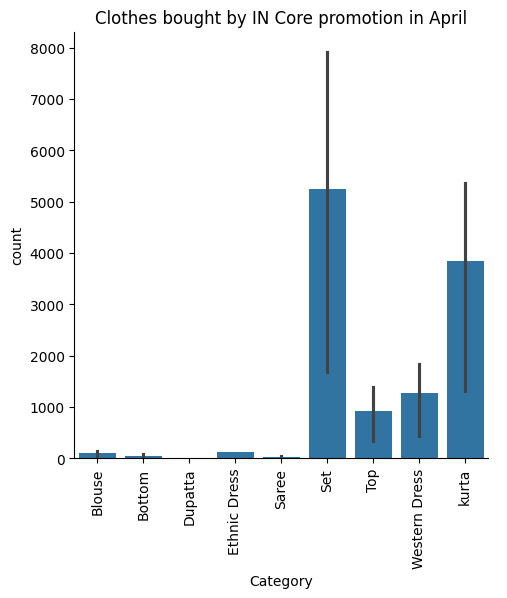

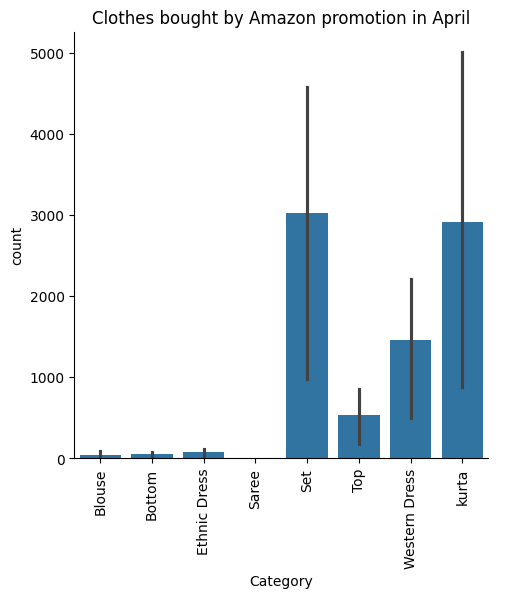

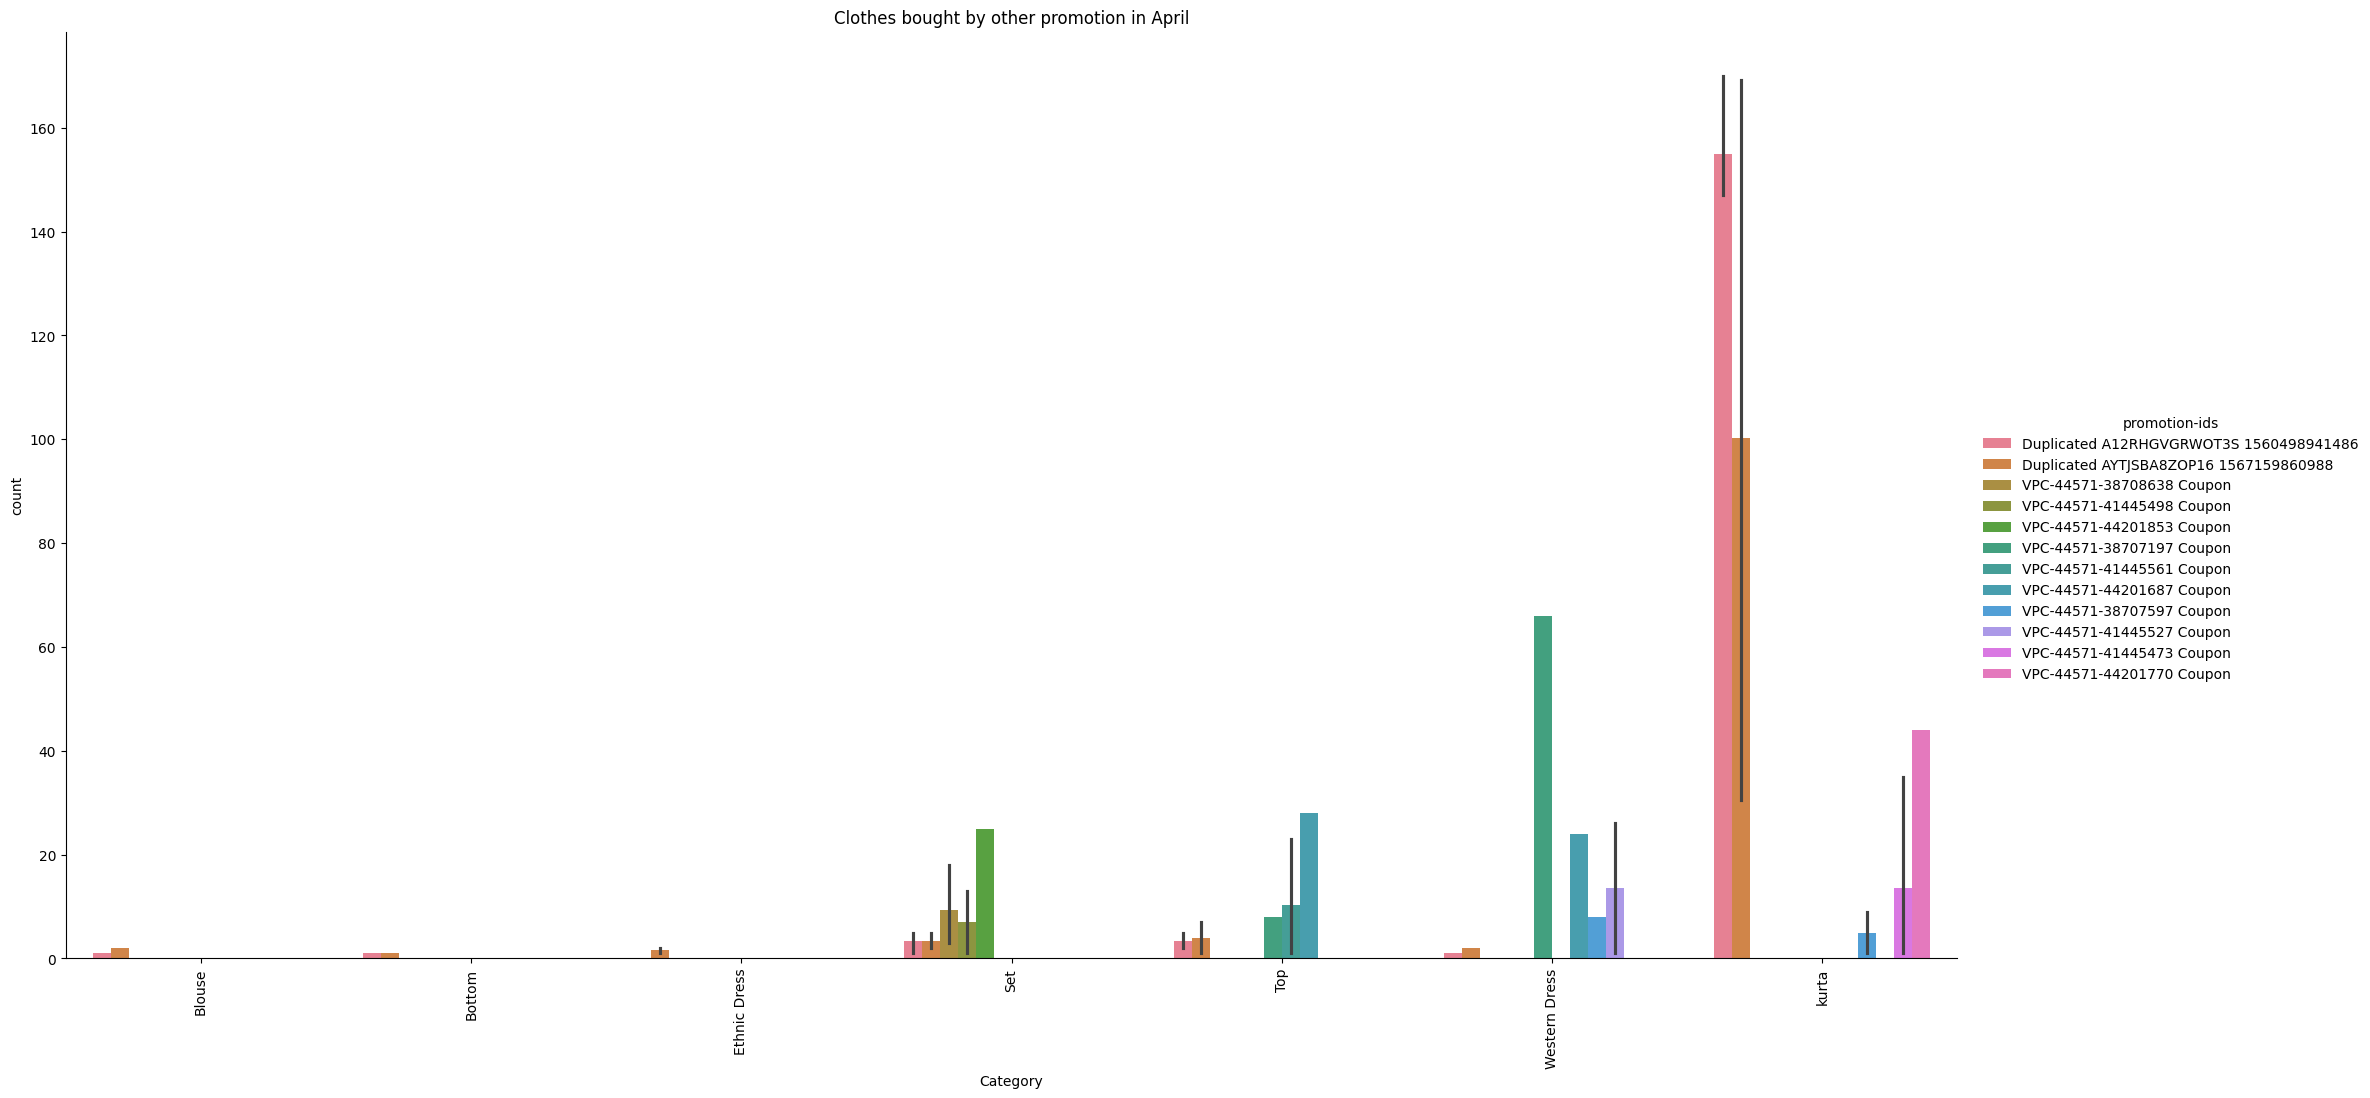

count
Category      promotion-ids                           months       
Blouse        Duplicated A12RHGVGRWOT3S 1560498941486 June        1
                                                      May         1
              Duplicated AYTJSBA8ZOP16 1567159860988  April       2
Bottom        Duplicated A12RHGVGRWOT3S 1560498941486 May         1
              Duplicated AYTJSBA8ZOP16 1567159860988  April       1
Ethnic Dress  Duplicated AYTJSBA8ZOP16 1567159860988  April       2
                                                      June        1
                                                      May         2
Set           Duplicated A12RHGVGRWOT3S 1560498941486 April       1
                                                      June        5
                                                      May         4
              Duplicated AYTJSBA8ZOP16 1567159860988  April       2
                                                      June        3
                                                      May         5
              VPC-44571-38708638 Coupon               April       3
                                                      June        7
                                                      May        18
              VPC-44571-41445498 Coupon               April       1
                                                      May        13
              VPC-44571-44201853 Coupon               June       25
Top           Duplicated A12RHGVGRWOT3S 1560498941486 April       5
                                                      June        2
                                                      May         3
              Duplicated AYTJSBA8ZOP16 1567159860988  April       7
                                                      June        1
                                                      May         4
              VPC-44571-38707197 Coupon               April       8
              VPC-44571-41445561 Coupon               April       1
                                                      June        7
                                                      May        23
              VPC-44571-44201687 Coupon               June       28
Western Dress Duplicated A12RHGVGRWOT3S 1560498941486 May         1
              Duplicated AYTJSBA8ZOP16 1567159860988  May         2
              VPC-44571-38707197 Coupon               April      66
              VPC-44571-38707597 Coupon               April       8
              VPC-44571-41445527 Coupon               April       1
                                                      May        26
              VPC-44571-44201687 Coupon               June       24
kurta         Duplicated A12RHGVGRWOT3S 1560498941486 April     147
                                                      June      170
                                                      May       148
              Duplicated AYTJSBA8ZOP16 1567159860988  April     198
                                                      June      119
                                                      March       1
                                                      May        83
              VPC-44571-38707597 Coupon               April       9
                                                      March       1
              VPC-44571-41445473 Coupon               April       1
                                                      June        5
                                                      May        35
              VPC-44571-44201770 Coupon               June       44

In [93]:
mask=vestiti_promo_2['promotion-ids'].str.contains('IN Core')
in_core=vestiti_promo_2[['promotion-ids','count','Category','months']][mask==True]
coupon=vestiti_promo_2[['promotion-ids','count','Category','months']][mask==False]
coupon=coupon[['promotion-ids','count','Category','months']][coupon['promotion-ids'].str.contains('Amazon')==False]

incore=in_core.groupby(['Category','months'])[['count','promotion-ids']].sum()

coupon=coupon.groupby(['Category','promotion-ids','months'])[['count']].sum()

amazon=vestiti_promo_2['promotion-ids'].str.contains('Amazon')
amazon_1=vestiti_promo_2[['promotion-ids','count','Category','months']][amazon==True]
amazon_2=amazon_1.groupby(['Category','months'])[['count','promotion-ids']].sum()





sns.catplot(incore,kind='bar',x='Category',y='count')
plt.xticks(rotation=90)
plt.title('Clothes bought by IN Core promotion in April')
plt.show()
sns.catplot(amazon_2,kind='bar',x='Category',y='count')
plt.title('Clothes bought by Amazon promotion in April')
plt.xticks(rotation=90)
plt.show()
sns.catplot(coupon,kind='bar',x='Category',y='count',hue='promotion-ids',aspect=2,height=10)
plt.xticks(rotation=90)
plt.title('Clothes bought by other promotion in April')
plt.show()

coupon



In aprile notiamo che le promozioni più usate per comprare (Western Dress) sono le promozioni duplicated. La promozione VCP invece è stata usata moderatamente per i western dress (spedizione gratuita) ma poco per quanto riguarda gli altri articoli come anche duplicated.
Quella di Amazon di più su kurta e set e lo stesso la promozioni IN CORE.


Perchè abbiamo quegli articoli venduti a 0.0?

In [94]:
print(df['Amount'][df['Amount']==0.0].value_counts())
articoli=df.groupby('Amount')[['months','year','Order ID','Status','promotion-ids','Courier Status']].value_counts().reset_index()
nulli=articoli[['Amount','months','year','Status','Order ID','promotion-ids','Courier Status']][articoli['Amount']==0.0]
count_ordini=nulli['months'].value_counts()
print(count_ordini)
lista_guadagno=[]
for months in ['April','May','June']:
    guadagno=df[['Amount','months']][df['months']==months]['Amount'].sum()
    income=[months,guadagno]
    lista_guadagno.append(income)


df_guadagni=pd.DataFrame(lista_guadagno)
df_guadagni

print(nulli['promotion-ids'].value_counts().reset_index()[nulli['promotion-ids'].value_counts().reset_index()['promotion-ids'].str.contains('VPC')]['count'].sum())

nulli['Order ID'].duplicated().value_counts() # non ci sono ordini gratis fatti dallo stesso cliente
stato=nulli['Status'].value_counts()
stato/stato.sum()*100
stato.sum()

nulli['Courier Status'].value_counts()

df['Amount'][df['Amount']==0.0]


Amount
0.0    2343
Name: count, dtype: int64
months
April    323
May      275
June     183
Name: count, dtype: int64
2


212       0.0
374       0.0
385       0.0
388       0.0
392       0.0
         ... 
128550    0.0
128612    0.0
128685    0.0
128804    0.0
128837    0.0
Name: Amount, Length: 2343, dtype: float64

Notiamo che nessuno di questi ordini senza pagamento è stato cancellato e che non ci sono ordini gratis dallo stesso cliente. Questi ordini gratis si sono avuti nel numero massimo ad Aprile mentre moderatamente a Giugno e poco meno a Maggio.
Potrebbero anche essere valori anomali.Comunque ad Aprile si è guadagnato di più mentre a Maggio moderatamente e a Giugno ancora meno. Questi potrebbero essere il motivo di questo calo di fatturato tra Aprile e Giugno?
Notiamo che la maggior parte di questi ordini è stato consegnato al cliente (87%) mentre 50 sono stati resi (6%), 5 sospesi (0.64%), 2 persi nel transito (0.25%) e 2 sono in fase di reso (in totale 57 di questi ordini sono nulli per questo motivo). Nessuno di loro si tratta di ordini cancellati ma 13 sono non spediti
Invece la maggior parte ha utilizzato la promozione Amazon (779) mentre soltanto 2 VCP coupon.
- 57 ordini nulli per reso,sospeso,perso nel transito e in fase di reso su 781 + 13 non spediti (in tutto 8,96%)
- 779 comprati con la promozione Amazon (non sappiamo cosa comporti) su 781 99,74%
- La maggior parte di loro si è avuta nel mese di Aprile
- Potrebbe anche essere un errore, in quanto abbiamo 7795 valori nulli su 128975 incassi 6,54%
- Sono 781 ordini nulli su 128975 ordini in totale (0,61%)


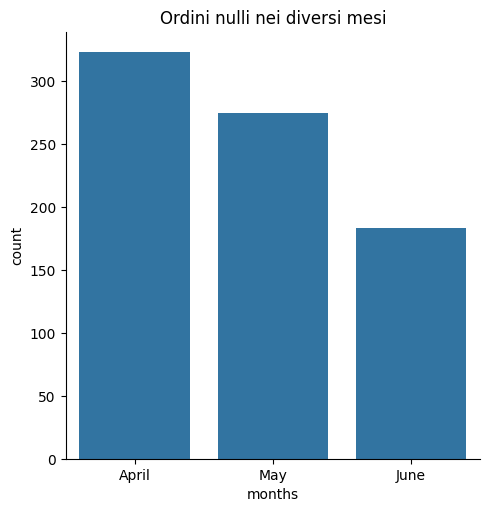

In [95]:


sns.catplot(data=count_ordini,kind='bar')
plt.title('Ordini nulli nei diversi mesi')
plt.show()





Valori anomali e nulli sulla colonna Amount?

In [96]:
df['Amount'].describe()
new_df=df.copy()
#new_df['Amount']=new_df['Amount'][new_df['Amount']!=0.0]
new_df['Amount']

0          647.62
1          406.00
2          329.00
3          753.33
4          574.00
           ...   
128970     517.00
128971     999.00
128972     690.00
128973    1199.00
128974     696.00
Name: Amount, Length: 128975, dtype: float64

In [97]:
df['Amount'][df['Amount'].isnull()==True]
new_df['Amount'].fillna(new_df['Amount'].median())
new_df['Amount'].describe()

count    121180.000000
mean        648.561465
std         281.211687
min           0.000000
25%         449.000000
50%         605.000000
75%         788.000000
max        5584.000000
Name: Amount, dtype: float64

In [98]:
#metodo percentili
sup=df['Amount'].quantile(0.99)
inf=df['Amount'].quantile(0.01)
out=df['Amount'].loc[(df['Amount']>sup)&(df['Amount']<inf)]
out

Series([], Name: Amount, dtype: float64)

In [99]:
#metodo zscore
superiore=df['Amount']+3*df['Amount'].std()
inferiore=df['Amount']-3*df['Amount'].std()
outliers=df['Amount'].loc[(df['Amount']>superiore)&(df['Amount']<inferiore)]
print(outliers)

Series([], Name: Amount, dtype: float64)


In [125]:
index=np.where(new_df['Amount']==0.0)[0]
new_df['free_order']=new_df['Amount'].iloc[index]
new_df['free_order']=new_df['free_order'].fillna('Order not null')
new_df['free_order']=new_df['free_order'].apply(lambda f:f if f!=0.0 else 'Order null')
count=new_df['free_order'].iloc[index].value_counts().sum()

new_df['Amount']=new_df['Amount'][new_df['Amount']!=0.0]
print(new_df['free_order'],count,len(df['Amount']),len(new_df['Amount']))

0         Order not null
1         Order not null
2         Order not null
3         Order not null
4         Order not null
               ...      
128970    Order not null
128971    Order not null
128972    Order not null
128973    Order not null
128974    Order not null
Name: free_order, Length: 117580, dtype: object 2343 128975 117580


<ipython-input-125-f509101898a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['free_order']=new_df['Amount'].iloc[index]
<ipython-input-125-f509101898a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['free_order']=new_df['free_order'].fillna('Order not null')
<ipython-input-125-f509101898a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Category       months
Set            May       1419
               June      1130
               April      936
Western Dress  June        21
               April       18
kurta          May         18
Ethnic Dress   June        16
Western Dress  May         11
kurta          June        11
               April        5
Ethnic Dress   April        3
Saree          May          3
Top            June         3
               May          3
Set            March        2
Top            April        1
Name: count, dtype: int64 months
May      1454
June     1181
April     963
March       2
Name: count, dtype: int64 Order ID
405-8750647-4224357    4
405-4755854-9568304    3
403-4288285-8521928    3
404-5228969-3185139    3
408-3363121-6123562    3
                      ..
407-3529569-1975531    1
407-8256890-3921126    1
402-9943629-1709940    1
406-5187379-0977964    1
402-8261465-0622733    1
Name: count, Length: 3534, dtype: int64
Valori tolti al di sopra del limite superiore [   102    14

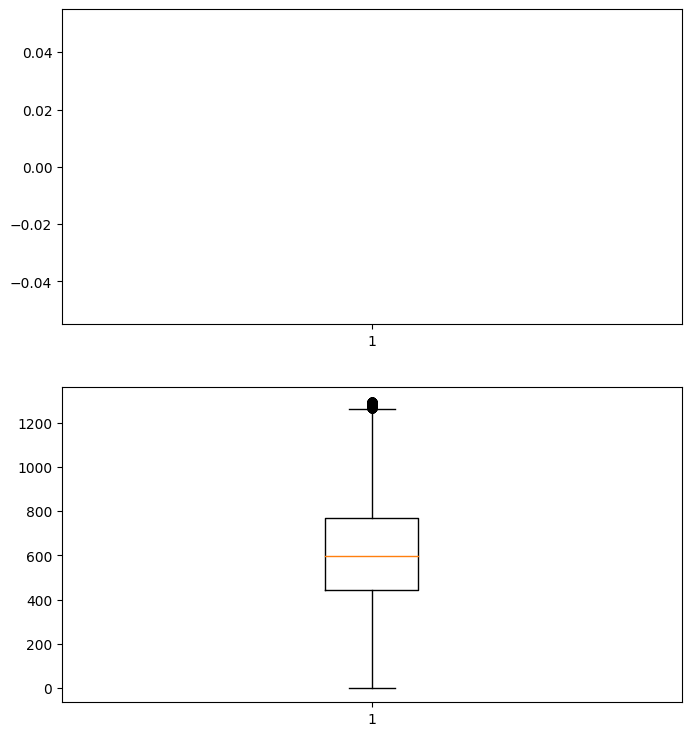

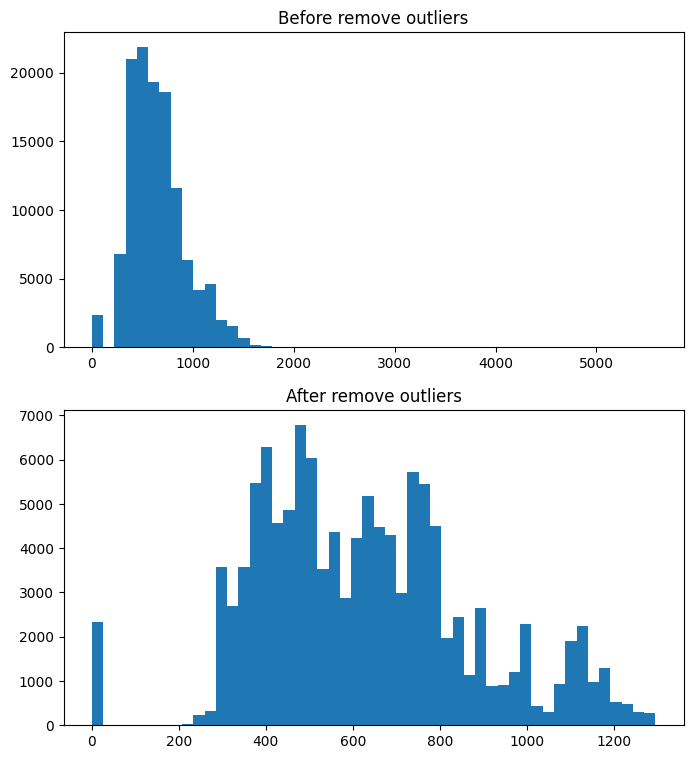

Before count    121180.000000
mean        648.561465
std         281.211687
min           0.000000
25%         449.000000
50%         605.000000
75%         788.000000
max        5584.000000
Name: Amount, dtype: float64
After count    117580.000000
mean        624.465036
std         246.652047
min           0.000000
25%         442.000000
50%         599.000000
75%         771.000000
max        1296.000000
Name: Amount, dtype: float64
Asimmetria (0.8854806405409467, 0.35247195950323157) Curtosi (3.0037534034823583, 0.07287847189953922)


In [122]:
#metodo interquartile
q1=df['Amount'].quantile(0.25)
q3=df['Amount'].quantile(0.75)
irq=q3-q1
upper=q3+(1.5*irq)
lower=q1-(1.5*irq)
#new_df=df.loc[(df['Amount']<upper)&(df['Amount']>lower)]
indice=np.array(df['Amount'][(df['Amount']>upper)&(df['Amount']>lower)].reset_index()['index'])
num=len(indice)
out=df[['Category','months']].iloc[indice].value_counts()
out1=df['months'].iloc[indice].value_counts()
out2=df['Order ID'].iloc[indice].value_counts()
print(out,out1,out2)
new_df=df.loc[(df['Amount']<upper)&(df['Amount']>lower)]
print('Valori tolti al di sopra del limite superiore',indice)
print('Numero valori anomali',num,'Lunghezza nuova colonna',len(df['Amount'])-len(new_df['Amount']))


fig,ax=plt.subplots(2,1,figsize=(8,9))
ax[1].boxplot(new_df['Amount'])
ax[0].boxplot(df['Amount'])
plt.plot()


fig,ax=plt.subplots(2,1,figsize=(8,9))
ax[1].hist(new_df['Amount'],bins=50)
ax[1].set_title('After remove outliers')
ax[0].hist(df['Amount'],bins=50)
ax[0].set_title('Before remove outliers')
plt.show()
print('Before',df['Amount'].describe())
print('After',new_df['Amount'].describe())
print('Asimmetria',(df['Amount'].skew(),new_df['Amount'].skew()),'Curtosi',(df['Amount'].kurt(),new_df['Amount'].kurt()))

In [102]:
guadagno=new_df.groupby('months')['Amount'].sum().reset_index()
guadagno_prima=df.groupby('months')['Amount'].sum().reset_index()
print(guadagno)
print(guadagno_prima)
somma2=new_df['Amount'].sum()
somma1=df['Amount'].sum()
print(somma1,somma2)


  months       Amount
0  April  27451387.67
1   June  21751054.39
2  March     98388.85
3    May  24123768.02
  months       Amount
0  April  28838708.32
1   June  23425809.38
2  March    101683.85
3    May  26226476.75
78592678.29999998 73424598.93



- I valori anomali abbassano il guadagno mentre gli ordini gratis non hanno un uguale impatto, anzi lasciano il guadagno invariato (vedremo poi la correlazione).

- Il numero dei valori anomali identificati dall'intervallo interquartile è 3600 su 117580 (3,06%).
Dall'istogramma si nota chiaramente che con i valori anomali l'intervallo dei dati era compreso tra 0 e 16000 (i valori erano maggiormente compresi prima di 1000 e calavano dopo 1000 fino a scomparire prima di 2000 (max 5584)) mentre senza è un intervallo più piccolo tra 0 e 5000 (maggiormente compresi tra da metà 200 a 800 per poi calare fino a 1200 (max 1299)).
La distribuzione in entrambi casi è poco asimmetrica ma nel primo caso la curtosi, quindi la concentrazione dei dati intorno alla media era maggiore mentre nel secondo caso questa togliendo i valori anomali è stata ridotta molto.
I dati sembrano distribuiti più ampiamente.


- Si è venduto di meno a marzo, picco basso in assoluto, e giugno quindi ai cambiamenti di stagione.

- I valori anomali si concentrano sul guadagno relativo al set (3487) mentre 50 su Western Dress, 34 kurta e 19 Ethic dress e questo vuol dire che i prezzi del set sono forse la maggiore causa dei valori anomali e il fatturato ha presentato maggiori valori anomali tra maggio e giugno e moderatamente ad aprile.
Il più alto numero di ordini con valori anomali si è avuto a Giugno dallo stesso cliente (4) ed infatti a Giugno si è avuto un calo delle vendite.
Anche a Maggio calo delle vendite ed è il mese in i set con valori anomali sono stati più acquistati.

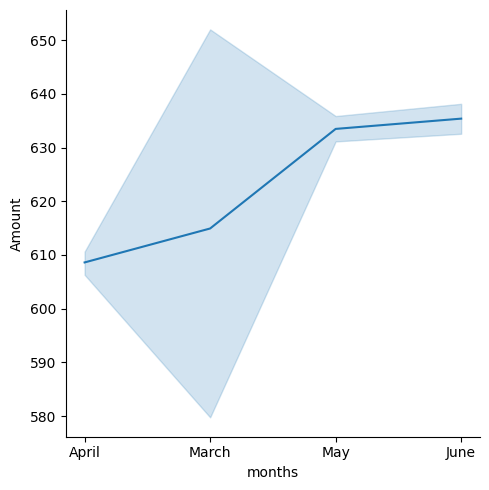

In [103]:
mes=['March','April','May','June']
sns.relplot(data=new_df,x='months',y='Amount',kind='line')
plt.show()

Shop da cui i clienti acquistano

In [104]:

channel=new_df[['Fulfilment','fulfilled-by','Sales Channel ','ship-service-level']].apply(lambda x:x.value_counts()).fillna(0).astype(int)
perc_channel=channel/channel.sum()*100
perc_channel.round(1)


,Fulfilment,fulfilled-by,Sales Channel,ship-service-level
Amazon,69.0,0.0,0.0,0.0
Amazon.in,0.0,0.0,100.0,0.0
Easy Ship,0.0,100.0,0.0,0.0
Expedited,0.0,0.0,0.0,68.2
Merchant,31.0,0.0,0.0,0.0
Standard,0.0,0.0,0.0,31.8


In [105]:
new_df[['ship-service-level','fulfilled-by']][(new_df['ship-service-level']=='Standard')|(new_df['fulfilled-by'].isin(['Easy Ship','Merchant']))].value_counts()

ship-service-level  fulfilled-by
Standard            Easy Ship       36498
Name: count, dtype: int64

- I clienti hanno comprato su Amazon (117580) e la maggior parte ha beneficiato della spedizione espressa (68%,80167) rispetto a quella standard (31%,915).

- I fornitori principali sono: al primo posto Amazon seguito da Merchant e Easy Ship (in ugual numero) (69% per Amazon e 31% per gli altri due).

- Il tipo di spedizione dipende anche dal tipo di fornitore.
La spedizione standard invece è stata utlizzata di più su Merchant che su Amazon (Merchant è uno strumento per far comparire la propria merce sulla barra di ricerca google da cui i clienti possono acquistare più facilmente e che promuove
la merce).
Lo stesso numero di persone ha utilizzato quella standard su Easy Ship.
Quindi Amazon ha il primato sulla spedizione espressa.


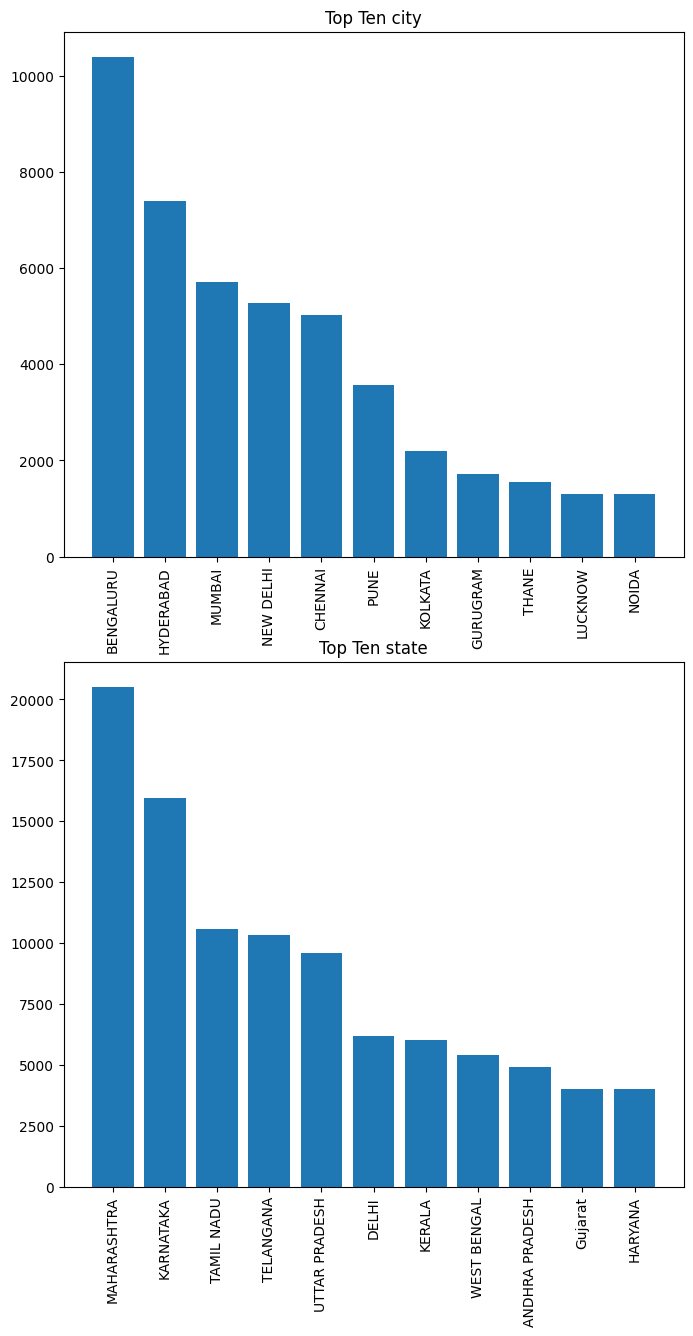

['BENGALURU', 'HYDERABAD', 'MUMBAI', 'NEW DELHI', 'CHENNAI', 'PUNE', 'KOLKATA', 'GURUGRAM', 'THANE', 'LUCKNOW', 'NOIDA', '8.84%', '6.29%', '4.86%', '4.49%', '4.28%', '3.03%', '1.86%', '1.46%', '1.33%', '1.11%', '1.1%']


['MAHARASHTRA',
 'KARNATAKA',
 'TAMIL NADU',
 'TELANGANA',
 'UTTAR PRADESH',
 'DELHI',
 'KERALA',
 'WEST BENGAL',
 'ANDHRA PRADESH',
 'Gujarat',
 'HARYANA',
 '17.46%',
 '13.57%',
 '9.0%',
 '8.79%',
 '8.15%',
 '5.27%',
 '5.12%',
 '4.6%',
 '4.18%',
 '3.42%',
 '3.42%']

In [106]:

provenienza=new_df['ship-city'].value_counts().reset_index()
stato=new_df['ship-state'].value_counts().reset_index()
stato_max=stato.iloc[stato['count'].nlargest(11).index].reset_index()
provenienza_max=provenienza.apply(lambda max:max.sort_values(ascending=True))
primi_dieci=provenienza_max.iloc[0:11]
perc_city=primi_dieci['count']/provenienza['count'].sum()*100
perc_city_1=[c for c in primi_dieci['ship-city'].to_list()]+[''.join(str(numb))+'%' for numb in perc_city.round(2).to_list()]
perc_stato=stato_max['count']/stato['count'].sum()*100
perc_stato_1=[s for s in stato_max['ship-state']]+[''.join(str(state))+'%' for state in perc_stato.round(2).to_list()]

fig,ax=plt.subplots(2,1,figsize=(8,15))
ax[0].bar(primi_dieci['ship-city'],primi_dieci['count'])
ax[0].tick_params(axis='x',labelrotation=90)
#ax[0].set_xticklabels(labels=perc_city_1)
ax[0].set_title('Top Ten city')
ax[1].bar(stato_max['ship-state'],stato_max['count'])
ax[1].set_title('Top Ten state')
ax[1].tick_params(axis='x',labelrotation=90)
#ax[1].set_xticklabels(labels=perc_stato_1)
plt.show()

print(perc_city_1)
perc_stato_1


- Il più alto numero di clienti proviene dalla città di Bengaluru e lo stato di Maharashtra e tutti i clienti sono provenienti dalla regione IN.

Provenienza clienti

In [107]:
new_df['ship-country'].value_counts()

ship-country
IN    117550
Name: count, dtype: int64

Quantità di vestiti acquistata e frequenza di acquisto

Qty
1    112261
0      5091
2       218
3        10
Name: count, dtype: int64


<ipython-input-108-9488ecb6b913>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lista=n,qty.iloc[gratis][qty['Category']==n]['count'].sum()
<ipython-input-108-9488ecb6b913>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lista=n,qty.iloc[gratis][qty['Category']==n]['count'].sum()
<ipython-input-108-9488ecb6b913>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lista=n,qty.iloc[gratis][qty['Category']==n]['count'].sum()
<ipython-input-108-9488ecb6b913>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lista=n,qty.iloc[gratis][qty['Category']==n]['count'].sum()


('Set', 1910) ('Set', 43555)
('kurta', 1953) ('kurta', 46683)
('Western Dress', 808) ('Western Dress', 14654)
('Top', 299) ('Top', 10158)
0.9587259738050689


,Qty,Category,Courier Status,months,count
0,1,kurta,Shipped,April,16635
56,2,kurta,Shipped,April,56
81,3,Blouse,Shipped,April,2
34,1,Saree,Shipped,April,65
61,2,Top,Shipped,April,12
71,2,Blouse,Shipped,April,2
21,1,Ethnic Dress,Shipped,April,301
19,1,Blouse,Shipped,April,354
10,1,Top,Shipped,April,3441
29,1,Bottom,Shipped,April,159


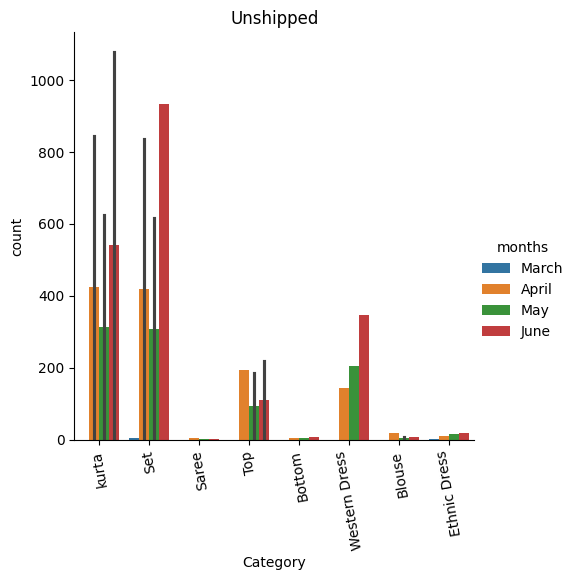

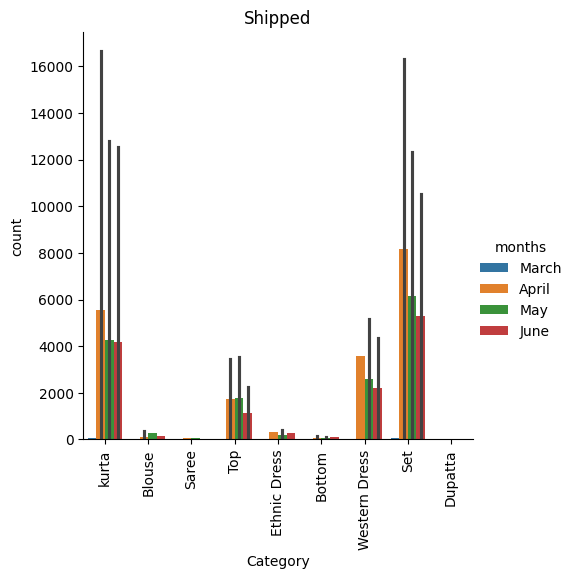

In [108]:
print(new_df['Qty'].astype(int).value_counts())
qty=new_df.groupby('Qty')[['Order ID','Category','months']].value_counts().reset_index()
gratis=qty['Qty'][qty['Qty']==0.0].index
clothes=new_df['Category'].unique()
for m,n in zip(mes,clothes):
    lista=n,qty.iloc[gratis][qty['Category']==n]['count'].sum()
    lista2=n,qty[qty['Category']==n]['count'].sum()
    print(lista,lista2)
qty1=qty.groupby('Qty')[['months','Category']].value_counts()
print(new_df['Qty'].mean())
qty2=new_df.groupby('Qty')['promotion-ids'].value_counts().reset_index()
qty2['Qty'].unique()
qty3=new_df.groupby('Qty')[['Category','Courier Status','months']].value_counts().reset_index()
unshipped=qty3[qty3['Courier Status']=='Unshipped'].sort_values(by='months',ascending=True)
shipped=qty3[qty3['Courier Status']=='Shipped'].sort_values(by='months',ascending=True)
sns.catplot(data=unshipped,y='count',x='Category',kind='bar',hue='months',col=1,hue_order=mes)
plt.xticks(rotation=100)
plt.title('Unshipped')
unshipped
sns.catplot(data=shipped,y='count',x='Category',kind='bar',hue='months',col=1,hue_order=mes)
plt.xticks(rotation=90)
plt.title('Shipped')
shipped


Scopriamo che la maggior parte dei clienti ha acquistato 1 solo capo di abbigliamento, mentre pochi 2 e ancora meno 3.

- La maggior parte dei clienti ha acquistato ad Aprile,Maggio e Giugno 1 quantità.

-C'è però un'incogruenza perchè abbiamo 5091 persone che hanno acquistato 0 capi.
Due clienti hanno acquistato ben 5 volte 0 capi e 46 clienti 3 volte 0 capi, 260 2 volte e 4378 1 volta.
Quindi la maggior parte degli stessi clienti ha acquistato 1 volta 0 capi (quindi man mano che dimuisce la quantità, aumentano il numero di clienti che acquistano 0 capi)
Pochissimi a marzo,1958 ad aprile,1540 a maggio e 1190 a giugno (quindi il maggior numero si è avuto tra aprile e maggio).
Ma com'è possibile?

- La kurta è il capo più non acquistato (1953) seguito da il set.

- Scopriamo però che la maggior parte dei capi è stato acquistato a 0 e solo (kurta e set, quindi c'è un problema li e ci potrebbe essere anche una correlazione con i valori anomali che abbassano il guadagno) e di più ad Aprile.
Che cosa è successo ai prezzi di questi articoli nel mese di Aprile?
A maggio anche se meno che ad Aprile mentre a Giugno soltanto i set ma ancora di meno.
E scopriamo anche che queste quantità 0 non sono state acquistate con nessuna promozione.

- Tutte le persone che hanno acquistato a 0 (5091) sono in realtà ordini cancellati e quindi anche i kurta e i set sono dovuti a questo (4,33%).

- Ma capiamo anche che nella quantità 1 abbiamo 42037 kurta spediti e 2546 non spediti (il 5,7% non spedito e il 94,28% spedito, quindi una minima parte). Quindi gli ordini cancellati non si verificano soltanto nella quantità 0.
Lo stesso per quanto riguarda i set (spediti 39216 e non spediti 2387, quindi 5,7% non spediti e 94,26% spediti).ma anche gli altri articoli seppur di meno sono stati non spediti. Perchè questa mancata spedizione?
Questo si verifica anche nella categoria 2 anche se di meno (es. kurta spediti 92 % e non spediti 7,91%) mentre nella categoria 3 no.

- Per quanto riguarda i kurta sono non spediti a Giugno 1079, 843 ad aprile contro i 624 di Maggio mentre a Marzo 0 (quantità 1). I set 934 Giugno, 835 aprile, 615 maggio e 3 marzo.
Pochi nella quantità 2 e 0 nella quantità 3.

- Dal grafico vediamo chiaramente vediamo che sia per i kurta che per i set ad aprile hanno avuto lo stesso numero di ordini non spediti alto mentre a maggio vi è stata una decrescita e a giugno una risalita più alta rispetto ad aprile soprattutto per i set mentre per gli ordini spediti nei set e i kurta notiamo una decrescita graduale tra aprile e giugno ma anche per gli altri articoli.
Vediamo infatti il guadagno decrescere dal grafico.


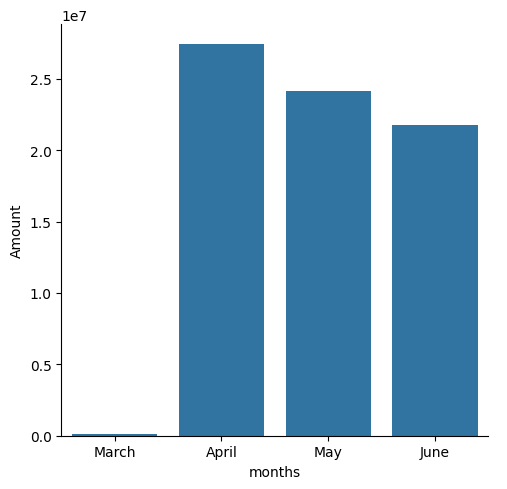

In [109]:
new_df['Amount']
xticks=['March','April','May','June']
sns.catplot(data=guadagno,x='months',y='Amount',order=xticks,kind='bar')
plt.show()

In [110]:

guadagno
guadagno_dettagliato=new_df[['Amount','months','Category']]#[new_df['Category']!='kurta']
guadagno_dettagliato

,Amount,months,Category
0,647.62,April,Set
1,406.00,April,kurta
2,329.00,April,kurta
3,753.33,April,Western Dress
4,574.00,April,Top
...,...,...,...
128970,517.00,May,kurta
128971,999.00,May,Set
128972,690.00,May,Western Dress
128973,1199.00,May,Set


In [133]:
print(df['Status'].value_counts())
resi=df['Status'][(df['Status']=='Shipped - Returned to Seller')|(df['Status']=='Shipped - Returning to Seller')]
persi=df['Status'][df['Status']=='Shipped - Lost in Transit']
cancellati=df['Status'][df['Status']=='Cancelled']
sospesi=df['Status'][(df['Status']=='Pending')|(df['Status']=='Pending - Waiting for Pick Up')]
resi,cancellati,sospesi,persi
new_df['resi']=resi
new_df['persi']=persi

Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64


<ipython-input-133-f586a8f9114b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['resi']=resi
<ipython-input-133-f586a8f9114b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['persi']=persi


Quindi c'è una correlazione decrescente tra il guadagno dettagliato per mesi di tutti gli articoli tranne i kurta e il guadagno dei kurta di -0,38. Ciò vuol dire che è possibile utilizzare la regressione lineare.
Abbiamo una correlazione crescente di 0.71 tra set e guadagno e ciò vuol dire che i set al contrario dei kurta fanno aumentare il guadagno mentre abbiamo una correlazione negativa di -0.54 tra kurta e set ciò vuol dire che come normalmente è all'aumentaree del guadagno dell'uno diminuisce l'altro.
Notiamo che la correlazione positiva scende se si considera il rapporto tra il guadagno e altri articoli come il western dress di 0.25 e con set e kurta di -0.26 quindi incidono di meno l'uno sul guadagno dell'altro.
E cala ancora di più con top arrivando ai -0.0610 e con gli altri 0.22.
Quindi la concentrazione è sui i set e i kurta.
La correlazione in generale tra guadagni mensili e guadagni dei kurta è -0.42.
Notiamo comunque che c'è una correlazione negativa intorno ai -0,27 tra western dress, kurta e set.


Scarsamente correlato il guadagno con stato di spedizione e promozioni,anche se con le promozioni abbiamo lo 0,34.
Notiamo però che se le promozioni incidono positivamente sul guadagno dei western dress ma negativamente sui kurta e i set con correlazione negativa dello -0,042 e -0,024.
La quantità però incide sullo stato di spedizione e viceversa.
C'è però una correlazione decrescente tra tipo di spedizione e promozioni di -0,69.

La stessa decrescita si osserva nei kurta e nei set. Anche se sappiamo che mediamente per i kurta si è speso a Marzo 462$, aprile 432$, a maggio 473$, a giugno $465. Ciò vuol dire che aumenta e decresce costantemente. Notiamo però man mano che passano i mesi il suo prezzo massimo si sta avvicinando al prezzo massimo in generale di 1296$.
Abbiamo una correlazione negativa tra il guadagno mensile e il guadagno mensile della kurta di -4,42,quindi considerevole.
Al decrescere dell'uno, abbiamo l'aumentare dell'altro.
Potremmo usare la regressione lineare per prevedere il prossimo mese, Luglio, quanto aumenterà il guadagno o dimuinirà in base alle future vendite dei kurta.

Ipotesi

- cannabilizzazione dei kurta nei confronti degli altri prodotti.
- impatto positivo dei set sul guadagno.
- scarso impatto della quantità ma anche degli altri fattori come lo stato del corriere e promozioni sul guadagno (tranne promozioni impatto positivo).
- effetto negativo delle promozioni sui kurta e sui set.
- correlazione positiva tra stato corriere e quantità.
- correlazione negativa tra tipo di spedizione e promozione.
- impatto negativo degli ordini gratis sul guadagno di -0,36 e sui kurta e i set del -0,10.

Obiettivi previsione

 - prevedere l'impatto e il numero futuro di ordini 0.0 e dei valori anomali sul guadagno utilizzando anche i dati in base alla stagionalità.
 - prevedere il guadagno prossimo di Luglio in base al guadagno dei kurta e quanto incide negativamente.
 - prevedere la relazione tra i kurta e gli altri prodotti e quanto aumenterà il guadagno
 - prevedere il numero di resi o ordini persi nel transito.

# Data preprocessing

Valori nulli

In [116]:
#new_df.drop(columns=['Unnamed: 22','outliers'],inplace=True)
new_df
new_df.isnull()[df.isnull()==True].sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         5091
Qty                       0
currency                  0
Amount                    0
ship-city                30
ship-state               30
ship-postal-code         30
ship-country             30
promotion-ids         40665
B2B                       0
fulfilled-by          81082
Unnamed: 22           45101
months                    0
year                      0
day                       0
dtype: object

Creazione altro dataset

In [141]:
outliers=df['Amount'].iloc[indice]
new_df['outliers']=outliers

df_train=new_df[['Status','Courier Status','promotion-ids','ship-service-level','Qty','Amount','free_order','months','year','day']]
df_train.dropna()
df_train




<ipython-input-141-e7e7d1712b1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['outliers']=outliers


,Status,Courier Status,promotion-ids,ship-service-level,Qty,Amount,free_order,months,year,day
0,0,0,0,0,0,647.62,0,April,2022,30
1,1,1,1,0,1,406.00,0,April,2022,30
2,2,1,2,1,1,329.00,0,April,2022,30
3,0,0,0,0,0,753.33,0,April,2022,30
4,2,1,0,1,1,574.00,0,April,2022,30
...,...,...,...,...,...,...,...,...,...,...
128970,2,1,0,1,1,517.00,0,May,2022,31
128971,2,1,2,1,1,999.00,0,May,2022,31
128972,2,1,0,1,1,690.00,0,May,2022,31
128973,2,1,2,1,1,1199.00,0,May,2022,31


<ipython-input-142-19ab5de345e6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kurta'].iloc[column1]=copy['kurta'].iloc[column2]
<ipython-input-142-19ab5de345e6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kurta'].iloc[column1]=copy['kurta'].iloc[column2]
<ipython-input-142-19ab5de345e6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kurta'].iloc[column1]=copy['kurta'].iloc[column2]
<ipython-input-142-19ab5de34

-0.4184452404891179


<ipython-input-142-19ab5de345e6>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Status']=pd.factorize(new_df['Status'])[0]
<ipython-input-142-19ab5de345e6>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Courier Status']=pd.factorize(new_df['Courier Status'])[0]
<ipython-input-142-19ab5de345e6>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

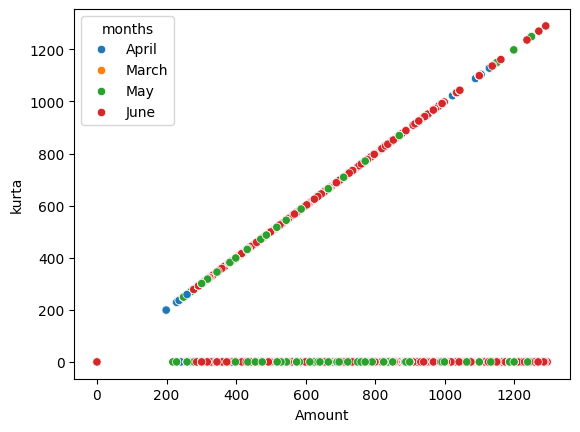

,Amount,kurta,set,western dress,Qty,Status,Courier Status,promotion-ids,ship-service-level,free_order,outliers,resi,persi
Amount,1.000000,-0.373050,0.685045,0.251793,0.022089,0.008776,0.014541,0.034635,0.041603,-0.361007,NaN,0.004389,-0.005950
kurta,-0.373050,1.000000,-0.535987,-0.276230,0.028390,0.001858,0.011387,-0.042099,0.049113,-0.106966,NaN,-0.009346,0.000512
set,0.685045,-0.535987,1.000000,-0.263095,-0.001725,0.008398,0.005281,-0.023548,0.032807,-0.101880,NaN,0.003878,-0.001460
western dress,0.251793,-0.276230,-0.263095,1.000000,-0.018812,-0.014886,-0.016554,0.133487,-0.096741,-0.052506,NaN,0.014931,-0.002401
Qty,0.022089,0.028390,-0.001725,-0.018812,1.000000,0.315377,0.673066,0.099783,0.303557,0.028125,NaN,0.028519,0.001286
Status,0.008776,0.001858,0.008398,-0.014886,0.315377,1.000000,0.150046,-0.011391,0.244444,0.021002,NaN,0.206308,0.019099
Courier Status,0.014541,0.011387,0.005281,-0.016554,0.673066,0.150046,1.000000,0.018013,0.291364,0.000217,NaN,-0.004388,-0.000222
promotion-ids,0.034635,-0.042099,-0.023548,0.133487,0.099783,-0.011391,0.018013,1.000000,-0.694924,0.010958,NaN,0.169019,0.003700
ship-service-level,0.041603,0.049113,0.032807,-0.096741,0.303557,0.244444,0.291364,-0.694924,1.000000,-0.120923,NaN,-0.188415,-0.009546
free_order,-0.361007,-0.106966,-0.101880,-0.052506,0.028125,0.021002,0.000217,0.010958,-0.120923,1.000000,NaN,0.005088,0.017736


In [142]:
anomalie=[]
months_1=[]
for m in mes:
    lista2=new_df[['Category','Amount','months']][(new_df['Category']=='kurta')&(new_df['months']==m)]['Amount'].sum()
    anomalie.append(lista2)
    kurta=pd.DataFrame(anomalie,columns=['guadagno'])
    months_1.append(m)
    kurta['months']=months_1


corr=guadagno['Amount'].corr(kurta['guadagno'])
kurta[['months_2','kurta']]=guadagno[['months','Amount']]
def spostamento(df,column1,column2):
   copy=df.copy()
   df['kurta'].iloc[column1]=copy['kurta'].iloc[column2]

spostamento(kurta,0,2)
spostamento(kurta,1,0)
spostamento(kurta,2,3)
spostamento(kurta,1,3)
kurta.drop(['months_2'],inplace=True,axis=1)
print(corr)

kurta_totale=new_df[['Amount','months','Category']][new_df['Category']=='kurta']
set_totale=new_df[['Amount','months','Category']][new_df['Category']=='Set']
western_dress=new_df[['Amount','months','Category']][new_df['Category']=='Western Dress']
kurta_totale.rename(columns={'Amount':'kurta','months':'months_1'},inplace=True)
set_totale.rename(columns={'Amount':'set','months':'months_2'},inplace=True)
western_dress.rename(columns={'Amount':'western dress','months':'months_3'},inplace=True)#.reset_index(drop=True,inplace=True)
data=pd.concat([guadagno_dettagliato,kurta_totale,set_totale,western_dress],axis=1)
data=data.fillna(0)
data['Qty']=new_df['Qty']
new_df['Status']=pd.factorize(new_df['Status'])[0]
new_df['Courier Status']=pd.factorize(new_df['Courier Status'])[0]
new_df['promotion-ids']=pd.factorize(new_df['promotion-ids'])[0]
new_df['ship-service-level']=pd.factorize(new_df['ship-service-level'])[0]
new_df['free_order']=pd.factorize(new_df['free_order'])[0]
data[['Status','Courier Status','promotion-ids','ship-service-level']]=new_df[['Status','Courier Status','promotion-ids','ship-service-level']]
data['free_order']=new_df['free_order']
data['outliers']=new_df['outliers']
new_df['resi']=pd.factorize(new_df['resi'])[0]
new_df['persi']=pd.factorize(new_df['persi'])[0]
data['resi']=new_df['resi']
data['persi']=new_df['persi']

corr_1=data.corr(numeric_only=True)
data

#sns.scatterplot(data=data,x='Amount',y='Amount_1',hue='months')
sns.scatterplot(data=data,x='Amount',y='kurta',hue='months')
plt.show()
corr_1